<a href="https://colab.research.google.com/github/RatanakamonS/DADS5001-PART1/blob/main/WOrk/test_corelation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from tabulate import tabulate
from scipy.stats import zscore
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress
import statsmodels.api as sm

In [27]:
#นำเข้าข้อมูลที่จะวิเคราะห์
df = pd.read_csv('https://raw.githubusercontent.com/RatanakamonS/WOrk/refs/heads/main/db-test.csv')

# แสดงจำนวนฟีเจอร์ทั้งหมด
num_features = df.shape[1]
print(f"จำนวนฟีเจอร์ทั้งหมด: {num_features} ฟีเจอร์")

summary_df = pd.DataFrame({
    'Feature': df.columns,
    'Datatype': [df[col].dtype for col in df.columns],
    'Total Count': [df[col].shape[0] for col in df.columns],
    'Non-Null Count': [df[col].notnull().sum() for col in df.columns],
    'Null Count': [df[col].isnull().sum() for col in df.columns]
})
# แสดงตารางข้อมูล
print(tabulate(summary_df, headers='keys', tablefmt='pretty', showindex=False))

จำนวนฟีเจอร์ทั้งหมด: 6 ฟีเจอร์
+----------------+----------+-------------+----------------+------------+
|    Feature     | Datatype | Total Count | Non-Null Count | Null Count |
+----------------+----------+-------------+----------------+------------+
| Car Production | float64  |     70      |       70       |     0      |
|    Country     | float64  |     70      |       70       |     0      |
|      year      | float64  |     70      |       70       |     0      |
|   Population   | float64  |     70      |       70       |     0      |
|      GDP       | float64  |     70      |       70       |     0      |
| GDP per Capita | float64  |     70      |       70       |     0      |
+----------------+----------+-------------+----------------+------------+


In [30]:
df.head()

,Car Production,Country,year,Population,GDP,GDP per Capita
0,23722890.0,1.0,2014.0,1.371860e+09,1.047562e+13,7636.07
1,24503326.0,1.0,2015.0,1.379860e+09,1.106157e+13,8016.45
2,28118794.0,1.0,2016.0,1.387790e+09,1.123331e+13,8094.39
3,29015440.0,1.0,2017.0,1.396215e+09,1.231049e+13,8817.05
4,27809200.0,1.0,2018.0,1.402760e+09,1.389491e+13,9905.41


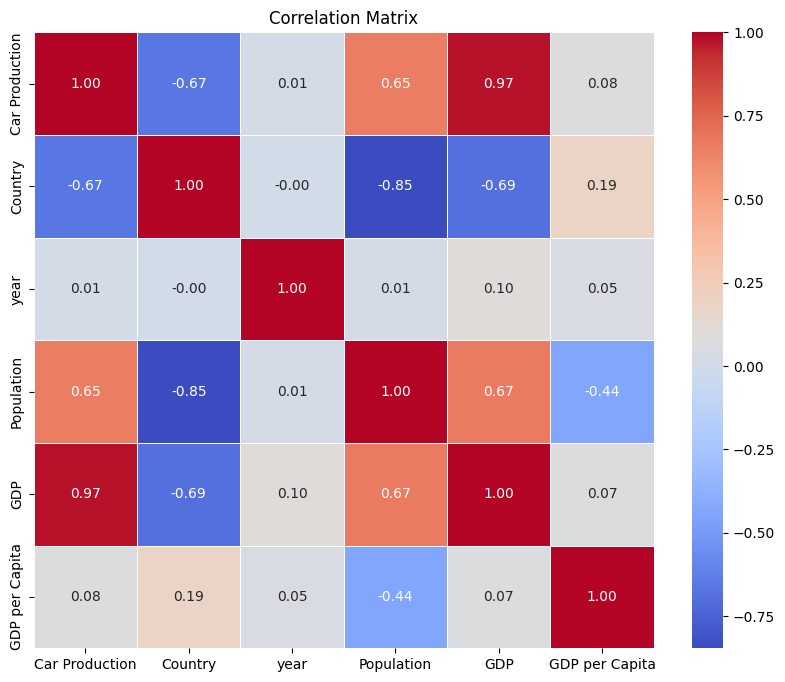

In [29]:
# คำนวณเมทริกซ์ค่าสหสัมพันธ์
correlation_matrix = df.corr()

# สร้างกราฟค่าสหสัมพันธ์
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [18]:
# เลือกฟีเจอร์ Car Production อย่างเดียว
car_product = 'Car Production'
df_car_product = df[[car_product]]
df_car_product = pd.DataFrame(df_car_product)

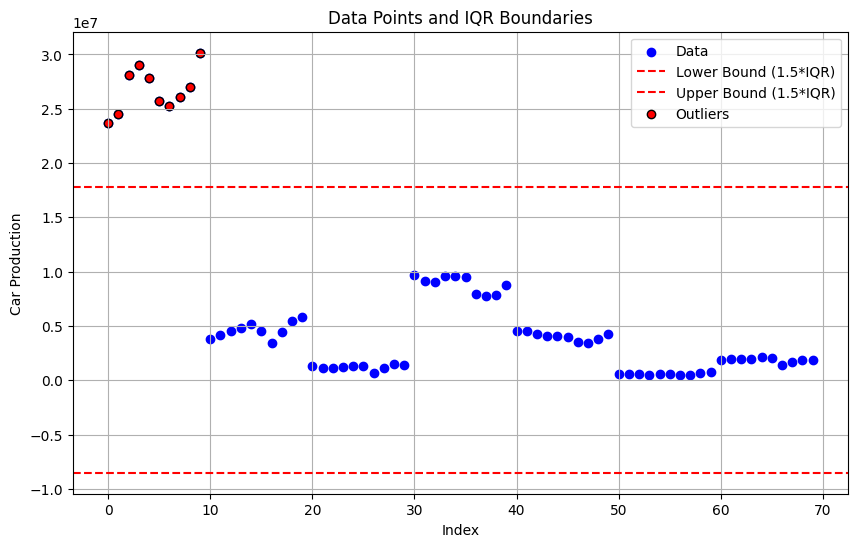

In [19]:
# คำนวณ Quartiles และ IQR
Q1 = df_car_product['Car Production'].quantile(0.25)
Q3 = df_car_product['Car Production'].quantile(0.75)
IQR = Q3 - Q1

# กำหนดค่าขอบเขตออกจากช่วง IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# สร้างกราฟ
plt.figure(figsize=(10, 6))

# Plot ข้อมูลทั้งหมด
plt.scatter(df_car_product.index, df_car_product['Car Production'], color='blue', label='Data')

# Plot ขอบเขต IQR
plt.axhline(y=lower_bound, color='red', linestyle='--', label='Lower Bound (1.5*IQR)')
plt.axhline(y=upper_bound, color='red', linestyle='--', label='Upper Bound (1.5*IQR)')

# Plot ข้อมูลที่อยู่นอกช่วง IQR
outliers = df_car_product[(df_car_product['Car Production'] < lower_bound) | (df_car_product['Car Production'] > upper_bound)]
plt.scatter(outliers.index, outliers['Car Production'], color='red', label='Outliers', edgecolor='black')

# ตั้งค่ากราฟ
plt.title('Data Points and IQR Boundaries')
plt.xlabel('Index')
plt.ylabel('Car Production')
plt.legend()
plt.grid(True)

# แสดงกราฟ
plt.show()